# Decision Trees

Decision Trees (DTs) are a **non-parametric supervised learning** method used for classification and regression.

Tree-based methods **partition the feature space into a set of rectangles**, and then fit a simple model (like a constant) in each one.

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

<img src="Images/00_DT_example.png" width="500">


We first split the space into two regions, and model the response by the mean of Y in each region.
We choose the variable and split-point to achieve the best fit.
Then one or both of these regions are split into two more regions, and this process is continued, until some stopping rule is applied. 

The full dataset sits at the top of the tree. 
Observations satisfying the condition at each junction are assigned to the left branch, and the others to the right branch. 
The terminal nodes or leaves of the tree correspond to the regions R1,R2,...,R5

A key advantage of the recursive binary tree is its interpretability.

<img src="Images/03_RBDT.png" width="800">

**Top left panel** - shows a general partition that cannot be obtained from recursive binary splitting.

**Top right panel** - shows a partition of a two-dimensional feature space by recursive binary splitting, as used in CART.

**Bottom left panel** -  shows the tree cor- responding to the partition in the top right panel.

**Bottom right panel** - a perspective plot of the prediction surface


### Advantages of decision trees

 - **Simple to understand and to interpret**. Trees can be visualised.
 - Requires **little data preparation**. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

 - The **cost of using the tree (i.e., predicting data) is logarithmic in the number of data points** used to train the tree.
 - Able to **handle both numerical and categorical data**. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
 - Able to **handle multi-output problems**.
 - Uses a **white box model**. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
 - **Possible to validate a model using statistical tests.** That makes it possible to account for the reliability of the model.
 - Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

### Disadvantages of decision trees

 - Decision-tree learners can create over-complex trees that do not generalise the data well. This is called **overfitting.** Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
 - Decision trees can be **unstable because small variations in the data might result in a completely different tree being generated.** This problem is mitigated by using decision trees within an ensemble.
 - The problem of **learning an optimal decision tree is known to be NP-complete** under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on **heuristic algorithms such as the greedy algorithm** where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
 - There are **concepts that are hard to learn** because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
 - Decision tree learners **create biased trees if some classes dominate**. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

## Classification Decision Tree

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset. As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples:

If the target is a classification outcome taking values 1,2,...,K, the only changes needed in the tree algorithm pertain to the criteria for splitting nodes and pruning the tree.

For regression we used the squared-error node impurity measure but this is not suitable for classification.

In a node m, representing a region $R_m$ with $N_m$ observations,

the proportion of class k observations in node m. We classify the observations in node m to class k(m) = argmax $pˆ_{mk}$ , the majority class node m. Different measures $Q_m$(T) of node impurity include the following:

<img src="Images/06_classification_cost.png" width="800">

For two classes, if p is the proportion in the second class,

**Misclassification Error :** 1 − max(p,1 − p)
 
**Gini Index :** 2p(1 − p)

**Cross Entropy :** −plogp − (1 − p)log(1−p)

All three are similar, but cross entropy and Gini Index are differentiable and hence more amenable to numerical optimization. 

In addition, cross-entropy and the Gini index are more sensitive to changes in the node probabilities than the misclassification rate. 

For example, in a two-class problem with 400 observations in each class (denote this by (400, 400)), suppose one split created nodes (300, 100) and (100, 300), while the other created nodes (200, 400) and (200, 0). Both splits produce a mis- classification rate of 0.25, but the second split produces a pure node and is probably preferable. Both the Gini index and cross-entropy are lower for the second split.

For this reason, either the Gini index or cross-entropy should be used when growing the tree. 

To guide cost-complexity pruning, any of the three measures can be used, but typically it is the misclassification rate.


In [53]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

After being fitted, the model can then be used to predict the class of samples:

In [54]:
clf.predict([[2., 2.]])

array([1])

Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:

In [55]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

DecisionTreeClassifier is capable of both **binary** (where the labels are [-1, 1]) classification and **multiclass** (where the labels are [0, …, K-1]) classification.

In [56]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

Once trained, you can plot the tree with the plot_tree function:

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

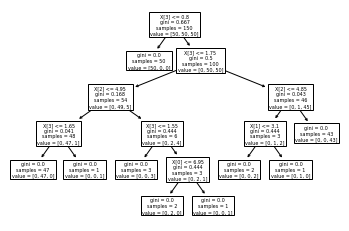

In [57]:
tree.plot_tree(clf)

In [58]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

In [59]:
from sklearn.datasets import load_iris

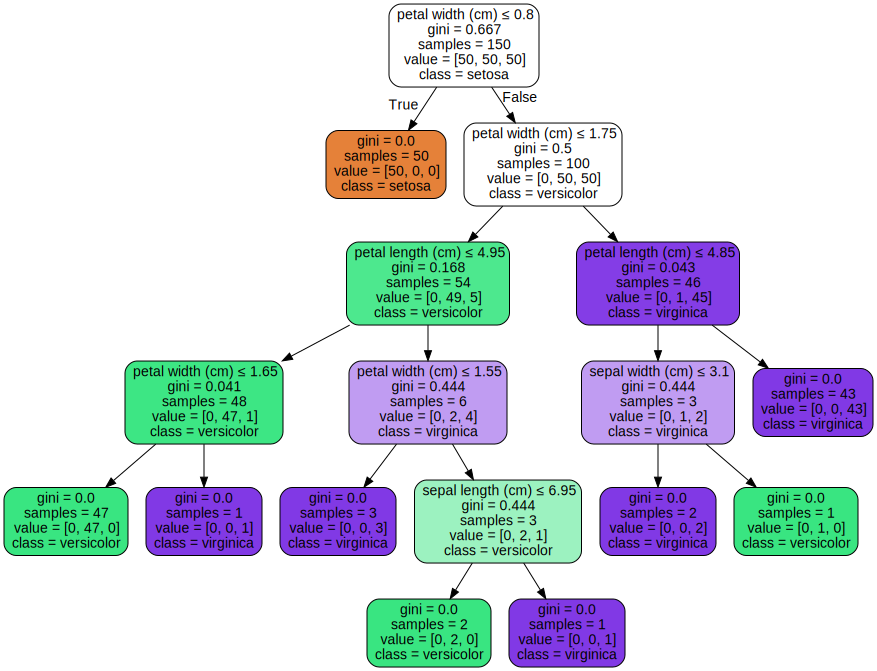

In [60]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [61]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)


|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



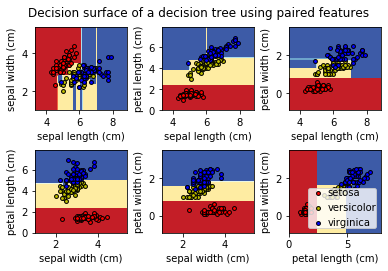

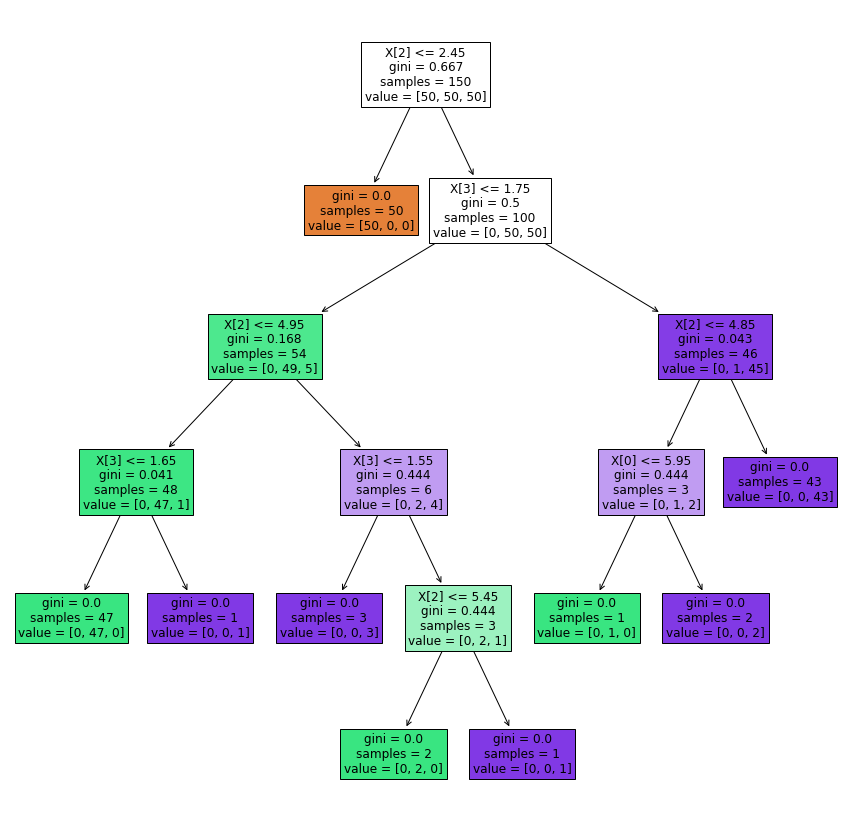

In [62]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(15,15))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

The decision tree structure can be analysed to gain further insight on the relation between the features and the target to predict. In this example, we show how to retrieve:

- the binary tree structure;
- the depth of each node and whether or not it’s a leaf;
- the nodes that were reached by a sample using the decision_path method;
- the leaf that was reached by a sample using the apply method;
- the rules that were used to predict a sample;
- the decision path shared by a group of samples.

In [63]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

estimator = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
estimator.fit(X_train, y_train)

# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = estimator.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = estimator.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 5 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 leaf node.
		node=4 leaf node.

Rules used to predict sample 0: 
decision id node 0 : (X_test[0, 3] (= 2.4) > 0.800000011920929)
decision id node 2 : (X_test[0, 2] (= 5.1) > 4.950000047683716)

The following samples [0, 1] share the node [0 2] in the tree
It is 40.0 % of all nodes.


## Regression

Decision trees can also be applied to regression problems, using the DecisionTreeRegressor class.

As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values:

### how to grow a regression tree

Our data consists of p inputs and a response, for each of N observations: that is, $(x_i,y_i)$ for i = 1,2,...,N, with $x_i = (x_{i,1},x_{i,2},...,x_{i,p})$. The algorithm needs to **automatically decide on the splitting variables and split points**, and also what topology (shape) the tree should have.

Suppose first that we have a partition into M regions $R_1, R_2, . . . , R_M$ , and we model the response as a constant cm in each region:

If we adopt as our criterior minimization of the sum of squares 

\begin{equation*}
\sum \left( y_i - f(x_i) \right)^2
\end{equation*} ,

it is easy to see that the best $c_m$ is just the average of $y_i$ in the region $R_m$


$$\begin{eqnarray}
c_m &=& ave \left(y_i | x_i  belongs to  R_m \right)
\end{eqnarray}$$ ,


Now finding the best binary partition in terms of minimum sum of squares is generally computationally infeasible. Hence we proceed with a greedy algorithm. 

Starting with all of the data, consider a splitting variable j and split point s, and define the pair of half-planes


$$\begin{eqnarray}
R_1\left(j,s \right) &=& \{ X|X_j \leq s \} 
and 
R_2\left(j,s \right) &=& \{ X|X_j \gt s \}
\end{eqnarray}$$ 


<img src="Images/04_equation.png" width="700">

For each splitting variable, the determination of the split point s can be done very quickly and hence by scanning through all of the inputs, determination of the best pair (j, s) is feasible.

Having found the best split, we partition the data into the two resulting regions and repeat the splitting process on each of the two regions. Then this process is repeated on all of the resulting regions.


### How large should we grow the tree?

A very large tree might overfit the data, while a small tree might not capture the important structure.

Tree size is a tuning parameter governing the model’s complexity, and the optimal tree size should be adaptively chosen from the data.

One approach would be to split tree nodes only if the decrease in sum-of-squares due to the split exceeds some threshold.This strategy is too short-sighted, however, since a seemingly worthless split might lead to a very good split below it

The preferred strategy is to grow a large tree T0, stopping the splitting process only when some minimum node size (say 5) is reached. Then this large tree is pruned using cost-complexity pruning.



We define a subtree T ⊂ T0 to be any tree that can be obtained by pruning T0, that is, collapsing any number of its internal (non-terminal) nodes. We index terminal nodes by m, with node m representing region Rm. Let |T| denote the number of terminal nodes in T. Letting

<img src="Images/05_pruning.png" width="700">

The idea is to find, for each α, the subtree Tα ⊆ T0 to minimize $C_α$(T). 

The tuning parameter α ≥ 0 governs the tradeoff between tree size and its goodness of fit to the data. 

Large values of α result in smaller trees Tα, and conversely for smaller values of α. 

As the notation suggests, with α = 0 the solution is the full tree T0.

For each α one can show that there is a unique smallest subtree $T_α$ that minimizes $C_α$(T). 

To find $T_α$ we use weakest link pruning: we successively collapse the internal node that produces the smallest per-node increase in $$\Sigma_m N_mQ_m(T)$$, and continue until we produce the single-node (root) tree. 

This gives a (finite) sequence of subtrees, and one can show this sequence must contain $T_α$.

Estimation of α is achieved by five- or tenfold cross-validation: we choose the value αˆ to minimize the cross-validated sum of squares. Our final tree i s $T_αˆ$ .

In [64]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

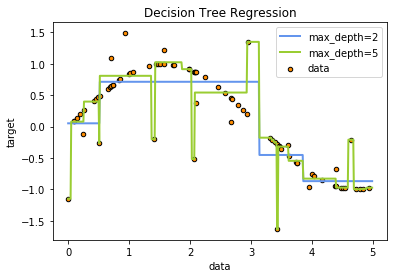

In [65]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Other Issues

### Categorical Predictors

When splitting a predictor having q possible unordered values, there are $2^{q−1}$ − 1 possible partitions of the q values into two groups, and the computations become prohibitive for large q. However, with a 0 − 1 outcome, this computation simplifies. 

We **order the predictor classes according to the proportion falling in outcome class 1**. 

Then we **split this predictor as if it were an ordered predictor.** One can show this gives the optimal split, in terms of cross-entropy or Gini index, among all possible $2^{q−1}$ −1 splits.

This result also holds for a quantitative outcome and square error loss— the **categories are ordered by increasing mean of the outcome**


The partitioning algorithm tends to **favor categorical predictors with many levels q**;

the number of partitions grows exponentially in q, and the more choices we have, the more likely we can find a good one for the data at hand. This can lead to **severe overfitting if q is large**, and such variables should be avoided.

### Loss Matrix

In classification problems, the consequences of misclassifying observations are more serious in some classes than others.

To account for this, we define a K × K loss matrix L, with $L_{kk′}$ being the loss incurred for classifying a class k observation as class k'. Typically no loss is incurred for correct classifications, that is $L_{kk}$ =0.

To incorporate the losses into modeling process, we can modify Gini index to 

\begin{equation*}
\sum L_{kk'} p_{mk} p_{mk'} 
\end{equation*} , for k not equal to k'

### Missing Predictor Values

Suppose our data has some missing predictor values in some or all of the variables. We might discard any observation with some missing values, but this could lead to serious depletion of the training set

Alternatively we might try to fill in (impute) the missing values, with say the mean of that predictor over the nonmissing observations. For tree-based models, there are two better approaches -

- The first is applicable to categorical predictors: we simply make a **new category for “missing.”**
- The second more general approach is the construction of **surrogate variables.** 
    - When considering a predictor for a split, we use only the observations for which that predictor is not missing. 
    - Having chosen the best (primary) predictor and split point, we form a list of surrogate predictors and split points
    - The first surrogate is the predictor and corresponding split point that best mimics the split of the training data achieved by the primary split.
    - The second surrogate is the predictor and corresponding split point that does second best, and so on. 
    - When sending observations down the tree either in the training phase or during prediction, we use the surrogate splits in order, if the primary splitting predictor is missing
    - Surrogate splits exploit correlations between predictors to try and alleviate the effect of missing data.  The higher the cor- relation between the missing predictor and the other predictors, the smaller the loss of information due to the missing value.
    

### Why Binary Splits?

Rather than splitting each node into just two groups at each stage (as above), we might consider multiway splits into more than two groups. While this can sometimes be useful, it is not a good general strategy. 

The problem is that multiway splits fragment the data too quickly, leaving insufficient data at the next level down. Hence we would want to use such splits only when needed. 

Since multiway splits can be achieved by a series of binary splits, the latter are preferred.

## Multi-output problems

A multi-output problem is a supervised learning problem with several outputs to predict, that is when Y is a 2d array of size [n_samples, n_outputs].

When there is no correlation between the outputs, a very simple way to solve this kind of problem is to build n independent models, i.e. one for each output, and then to use those models to independently predict each one of the n outputs. However, because it is likely that the output values related to the same input are themselves correlated, an often better way is to build a single model capable of predicting simultaneously all n outputs. First, it requires lower training time since only a single estimator is built. Second, the generalization accuracy of the resulting estimator may often be increased.

With regard to decision trees, this strategy can readily be used to support multi-output problems. This requires the following changes:

Store n output values in leaves, instead of 1;
Use splitting criteria that compute the average reduction across all n outputs.
This module offers support for multi-output problems by implementing this strategy in both DecisionTreeClassifier and DecisionTreeRegressor. If a decision tree is fit on an output array Y of size [n_samples, n_outputs] then the resulting estimator will:

Output n_output values upon predict;
Output a list of n_output arrays of class probabilities upon predict_proba.
The use of multi-output trees for regression is demonstrated in Multi-output Decision Tree Regression. In this example, the input X is a single real value and the outputs Y are the sine and cosine of X.

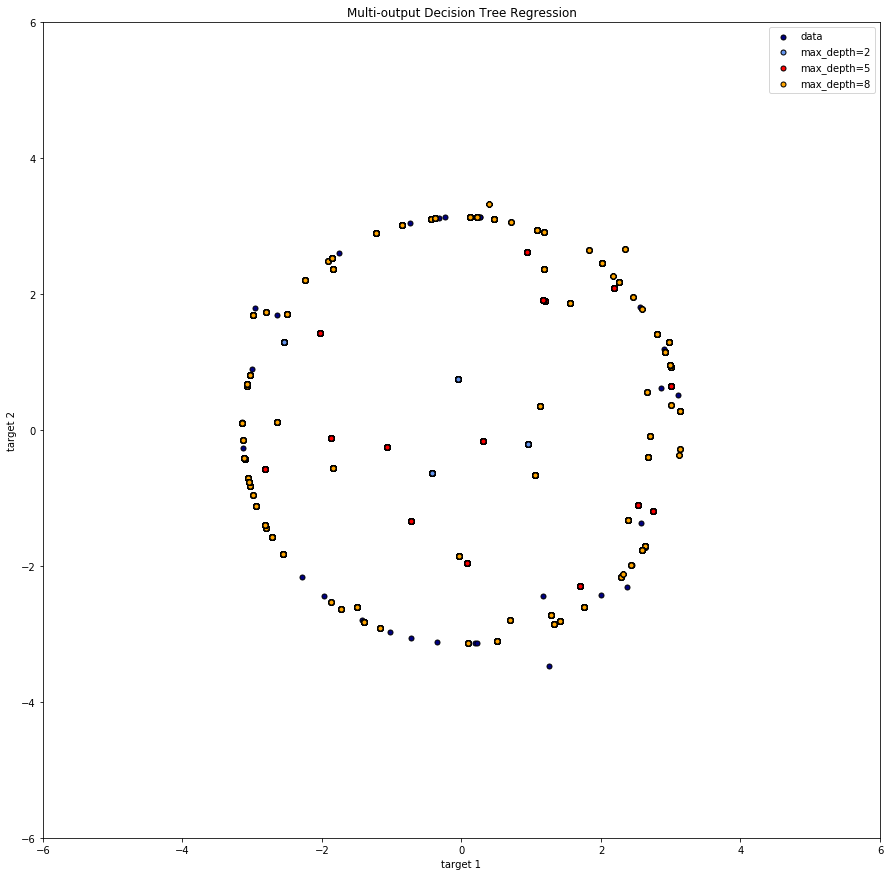

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure(figsize=(15,15))
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
            edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

## Complexity

In general, the run time cost to construct a balanced binary tree is 
O
(
n
s
a
m
p
l
e
s
n
f
e
a
t
u
r
e
s
log
⁡
(
n
s
a
m
p
l
e
s
)
)
 and query time 
O
(
log
⁡
(
n
s
a
m
p
l
e
s
)
)
. Although the tree construction algorithm attempts to generate balanced trees, they will not always be balanced. Assuming that the subtrees remain approximately balanced, the cost at each node consists of searching through 
O
(
n
f
e
a
t
u
r
e
s
)
 to find the feature that offers the largest reduction in entropy. This has a cost of 
O
(
n
f
e
a
t
u
r
e
s
n
s
a
m
p
l
e
s
log
⁡
(
n
s
a
m
p
l
e
s
)
)
at each node, leading to a total cost over the entire trees (by summing the cost at each node) of 
O
(
n
f
e
a
t
u
r
e
s
n
s
a
m
p
l
e
s
2
log
⁡
(
n
s
a
m
p
l
e
s
)
)
.

## Tips on practical use

- Decision trees **tend to overfit on data with a large number of features**. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.

- Consider performing **dimensionality reduction (PCA, ICA, or Feature selection)** beforehand to give your tree a better chance of finding features that are discriminative.

- **Understanding the decision tree structure** will help in gaining more insights about how the decision tree makes predictions, which is important for understanding the important features in the data.

- **Visualise your tree** as you are training by using the export function. Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.

- Remember that the **number of samples required to populate the tree doubles for each additional level the tree grows to.** Use max_depth to control the size of the tree to prevent overfitting.

- Use **min_samples_split or min_samples_leaf** to ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. Try min_samples_leaf=5 as an initial value. If the sample size varies greatly, a **float number can be used as percentage in these two parameters**. While min_samples_split can create arbitrarily small leaves, min_samples_leaf guarantees that each leaf has a minimum size, avoiding low-variance, over-fit leaf nodes in regression problems. For classification with few classes, min_samples_leaf=1 is often the best choice.

- **Balance your dataset** before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by **sampling an equal number of samples from each class**, or preferably by **normalizing the sum of the sample weights (sample_weight) for each class to the same value**. Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf.

- If the **samples are weighted**, it will be easier to optimize the tree structure using **weight-based pre-pruning criterion such as min_weight_fraction_leaf**, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.

- All decision trees use np.float32 arrays internally. If training data is not in this format, a copy of the dataset will be made.

- If the **input matrix X is very sparse, it is recommended to convert to sparse csc_matrix before calling fit and sparse csr_matrix before calling predict.** Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.

## Tree algorithms

**ID3 (Iterative Dichotomiser 3)** was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

**C4.5** is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

**C5.0** is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

**CART (Classification and Regression Trees)** is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

**scikit-learn uses an optimised version of the CART algorithm**; however, scikit-learn implementation does not support categorical variables for now.

## Mathematical Formulation

<img src="Images/01_Mathematical_Formulation.png" width="1000">

### Classification Criteria

<img src="Images/01a_classification_criteria.png" width="1000">

### Regression Criteria

<img src="Images/01b_regression_criteria.png" width="1000">

## Minimal Cost- Complexity Pruning

<img src="Images/02_Minimal_cost_pruning.png" width="1000">

Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, **ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.** Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

In [67]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

Minimal cost complexity pruning recursively finds the node with the **“weakest link”**. The weakest link is characterized by an effective alpha, where the **nodes with the smallest effective alpha are pruned first**. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides **DecisionTreeClassifier.cost_complexity_pruning_path** that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [68]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
#path = clf.cost_complexity_pruning_path(X_train, y_train)
#ccp_alphas, impurities = path.ccp_alphas, path.impurities



In [69]:
??DecisionTreeClassifier

# Ensemble Methods

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

**Bagging :** In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

**Boosting :** By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble

## Bagging 

Bagging methods form a class of algorithms which **build several instances** of a black-box estimator on **random subsets** of the original training set and then **aggregate their individual predictions** to form a final prediction. 

These methods are used as a **way to reduce the variance of a base estimator** (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

As they provide a way to **reduce overfitting, bagging methods work best with strong and complex models** (e.g., fully developed decision trees), in contrast with **boosting methods which usually work best with weak models** (e.g., shallow decision trees).

Bagging methods come in many flavours but mostly differ from each other by the **way they draw random subsets of the training set:**
- When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting
- When samples are drawn with replacement, then the method is known as Bagging
- When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces
- Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches

In scikit-learn, bagging methods are offered as a unified BaggingClassifier meta-estimator (resp. BaggingRegressor), taking as input a user-specified base estimator along with parameters specifying the strategy to draw random subsets. 
 - max_samples and max_features control the size of the subsets (in terms of samples and features)
 - bootstrap and bootstrap_features control whether samples and features are drawn with or without replacement
 
When using a subset of the available samples the generalization accuracy can be estimated with the **out-of-bag samples by setting oob_score=True**


In [70]:
from sklearn.ensemble import BaggingClassifier #bagging
from sklearn.neighbors import KNeighborsClassifier # base estimator
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5) #50% of sample & 50% of features

## Forests of randomized trees

The sklearn.ensemble module includes two averaging algorithms based on randomized decision trees: the **RandomForest** algorithm and the **Extra-Trees** method.

Both algorithms are perturb-and-combine techniques specifically designed for trees.

This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

In [71]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

### Random Forest

In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a **sample drawn with replacement** (i.e., a bootstrap sample) from the training set.

Furthermore, when splitting each node during the construction of a tree, the **best split is found either from all input features or a random subset of size max_features**

The purpose of these two sources of randomness is to **decrease the variance of the forest estimator.**
Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. **By taking an average of those predictions, some errors can cancel out.**

Random forests achieve a **reduced variance by combining diverse trees,** sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

the scikit-learn implementation combines classifiers by **averaging their probabilistic prediction,** instead of letting each classifier vote for a single class

### Extremely Randomized Trees

In extremely randomized trees (see ExtraTreesClassifier and ExtraTreesRegressor classes), randomness goes one step further in the way splits are computed. 

As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, **thresholds are drawn at random for each candidate feature** and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias:

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999

True

### Parameters

The main parameters to adjust when using these methods is **n_estimators and max_features.**


- **n_estimators** : the number of trees in the forest. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees.

- **max_features** : size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias.

Empirical good default values are **max_features=None** (always considering all features instead of a random subset) **for regression problems**, and **max_features="sqrt"** (using a random subset of size sqrt(n_features)) for **classification tasks** (where n_features is the number of features in the data). The best parameter values should always be cross-validated.


In addition, note that **in random forests, bootstrap samples are used by default (bootstrap=True) while the default strategy for extra-trees is to use the whole dataset (bootstrap=False)**. When using bootstrap sampling the generalization accuracy can be estimated on the left out or out-of-bag samples. This can be enabled by setting oob_score=True.


### Parallelization

Finally, this module also features the parallel construction of the trees and the parallel computation of the predictions through the **n_jobs parameter**. 

If **n_jobs=k then computations are partitioned into k jobs, and run on k cores of the machine.** 

If **n_jobs=-1 then all cores available on the machine are used.**

Note that because of inter-process communication overhead, the speedup might not be linear (i.e., using k jobs will unfortunately not be k times as fast). Significant speedup can still be achieved though when building a large number of trees, or when building a single tree requires a fair amount of time

### Feature importance evaluation

The relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. 

Features used at the top of the tree contribute to the final prediction decision of a larger fraction of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate of the relative importance of the features.

In scikit-learn, the fraction of samples a feature contributes to is combined with the decrease in impurity from splitting them to create a normalized estimate of the predictive power of that feature.

By averaging the estimates of predictive ability over several randomized trees one can reduce the variance of such an estimate and use it for feature selection. This is known as the mean decrease in impurity, or MDI.

In practice those estimates are stored as an attribute named feature_importances_ on the fitted model. This is an array with shape (n_features,) whose values are positive and sum to 1.0. The higher the value, the more important is the contribution of the matching feature to the prediction function.

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


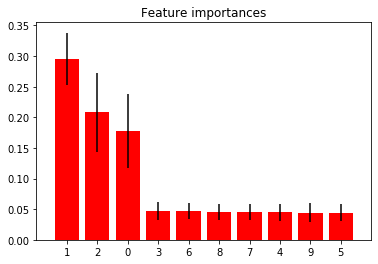

In [73]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()